<a href="https://colab.research.google.com/github/Colsai/DATA602_DA_ML/blob/main/SH_Lecture_02IntroML_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## LINEAR REGRESSION

In [40]:
#Importing pandas, sklearn, matplotlib, numpy, sklearn linear model.
import pandas as pd
import numpy as np
from sklearn import datasets

# from matplotlib import pyplot
from matplotlib import pyplot
from matplotlib import pylab

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

First, lets talk about linear regression. The goal is to learn a set of weights $w$ to predict a value $y$, based on a datapoint $x$. If $x$ has $d$ features, this looks like:

$$w_1 \cdot x_1 + w_2 \cdot x_2 + \ldots + w_{d-1} \cdot x_{d-1} + w_d \cdot x_d = \hat{y}$$

Written with more math-like notation, that becomes

$$\hat{y} = \sum_{i=1}^d w_i \cdot x_i = w^T x$$


To learn these weights $w$ we use our training data. We have $n$ datapoints, $x^{(1)}, x^{(2)}, \ldots, x^{(n)}$ and associated labels $y_1, y_2, \ldots, y_n$. 

We will use what is called an ***objective function***. An objective function is a function that describes a score we want to minimize in order to acheive our goal. Designing a good objective function requires some thought we will discuss later in the course. 

For linear regression, our objective function takes in our training data $X$ and our labels $Y$ is 

$$L(X, Y) = \frac{1}{n} \sum_{i=1}^n \left(\underbrace{w^T x^{(i)}}_{\text{Prediction}} - \underbrace{y_i}_{\text{Target}}\right)^2$$

Optimization is done using a gradient, so we a need a gradient (I'm not going to make you do this manuallly)

$$\nabla_w L(X, Y) =  \frac{1}{n} \sum_{i=1}^n 2 \cdot x^{(i)} \cdot \underbrace{(w^T x^{(i)}-y_i)}_{\text{The error}}$$

Lets look at some naive code for this. 

In [2]:
#Gradiant Step will be looked at later
def _gradient_step(w, error, rate = .1):
    update = error(w) * rate
    return w - update
  
#Calculates Linear Regression
def linear_regression(X,y):
  def objective_func(w):
    return np.sum((X @ w - y) @ (X @ w - y))/len(y)
  def gradient(w):
    return np.sum([2*X[i] * (X[i]@w - y[i]) for i in range(y.shape[0])])/len(y)

  
  #Lets pick some starting value for our weight vector. 
  w = np.zeros(X.shape[1])
  
  for i in range(20):
    w = _gradient_step(w, gradient)
    print(w,objective_func(w))
  return w  
  

[We will use this function to make a toy regression problem](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html )

In [41]:
#Creates regression data
data = datasets.make_regression(100,1,noise = 7)

In [44]:
data

(array([[-1.26151854],
        [-1.13301872],
        [-1.14784521],
        [ 1.21920933],
        [ 1.16839584],
        [-1.62007877],
        [-0.18383502],
        [ 0.3332172 ],
        [ 0.37854768],
        [ 1.3088106 ],
        [-1.05812216],
        [-1.59956145],
        [ 0.13100791],
        [-0.10381641],
        [ 1.04583612],
        [ 0.27257253],
        [-0.9110102 ],
        [ 0.99291314],
        [-2.05869198],
        [-0.99559876],
        [-2.64207723],
        [ 1.64226678],
        [-2.0583323 ],
        [ 0.28785735],
        [ 0.68405919],
        [-0.37600188],
        [-0.61938722],
        [ 1.63461167],
        [ 0.42424762],
        [-0.44785045],
        [ 0.61434361],
        [ 1.29423821],
        [-1.61583234],
        [-1.22537196],
        [-1.70507082],
        [ 0.23840205],
        [ 0.41629974],
        [-0.30310996],
        [ 0.38279809],
        [-0.24668869],
        [ 0.75454629],
        [ 2.10902079],
        [ 0.67572377],
        [ 0

In [45]:
w = linear_regression(data[0], data[1])

[11.94215413] 2054.7354684143193
[21.28228852] 1277.3938683489225
[28.58734502] 801.8913547332222
[34.30073715] 511.0248419467875
[38.76926518] 333.10080193021366
[42.26416668] 224.26405853011275
[44.99758054] 157.688250601988
[47.13542373] 116.96360134462657
[48.80746234] 92.05219420217595
[50.11518832] 76.81380130908634
[51.13798005] 67.4924242934755
[51.93792051] 61.79050611373359
[52.5635657] 58.302623274747155
[53.05289201] 56.169073420994835
[53.43560132] 54.863973683249824
[53.7349239] 54.06563971300466
[53.96902849] 53.57729609480072
[54.15212513] 53.278574634448375
[54.29532771] 53.09584569615851
[54.40732855] 52.98406978006211


In [46]:
#Create dataframe from previous data, then creates column headers 'x' and 'y'.
df=pd.DataFrame(data=np.c_[data[0],data[1]], columns=['X','Y'])

Now lets solve this linear regression problem using a real implementation. The toy implementation above is just for demonstration, and dosn't have all the features we would want when doing some real machine learning. 

In [6]:
df.head()

,X,Y
0,1.072772,51.978555
1,-0.562058,-40.238369
2,0.397649,21.851170
3,-0.072521,10.008840
4,-0.162372,-1.601852


In [47]:
len(df)

100

In [48]:
#Reshape the model
X = df['X'].values.reshape(-1, 1) 
Y = df['Y'].values

In [8]:
lr = LinearRegression()
lr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
#Prints the Coefficient and Intercept (y = aX + B)
lr.coef_, lr.intercept_

(array([56.33199739]), 0.35627408645578607)

The new version has whats called an ***intercept***. We will often denote the intercept as $\beta$, and it solves a slightly different problem, one where we want something of the form 

$$\hat{y} = w^T x + \beta$$

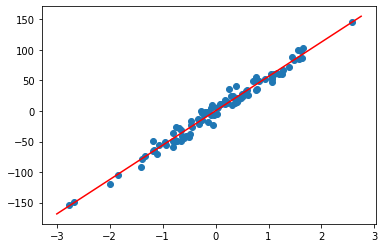

In [10]:
f = lambda x: lr.coef_[0] * x + lr.intercept_
steps = list(np.arange(-3,3,.25))
fitline = list(map(f, steps))
pyplot.plot(steps, fitline,color='red')
pyplot.scatter(x=df.X,y=df.Y)

Why would we ever want an intercept term? Lets try some slightly different data

In [11]:
df["Y"] += 40

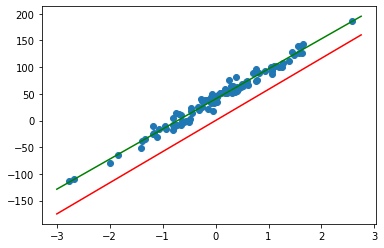

In [12]:
lr_a = LinearRegression(fit_intercept=False)
lr_a.fit(df['X'].values.reshape(-1, 1),df['Y'])


lr_b = LinearRegression(fit_intercept=True)
lr_b.fit(df['X'].values.reshape(-1, 1),df['Y'])

f = lambda x: lr_a.coef_[0] * x + lr_a.intercept_
steps = list(np.arange(-3,3,.25))
pyplot.plot(steps, list(map(f, steps)),color='red')

f = lambda x: lr_b.coef_[0] * x + lr_b.intercept_
steps = list(np.arange(-3,3,.25))
pyplot.plot(steps, list(map(f, steps)),color='green')

pyplot.scatter(x=df.X,y=df.Y)

In [13]:
data = datasets.load_boston()

In [14]:
data

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [15]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [16]:
housing_df = pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target'])

In [17]:
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [18]:
housing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


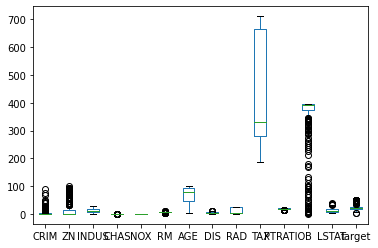

In [19]:
housing_df.plot.box()

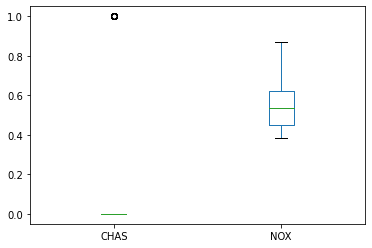

In [20]:
housing_df[['CHAS','NOX']].plot.box()

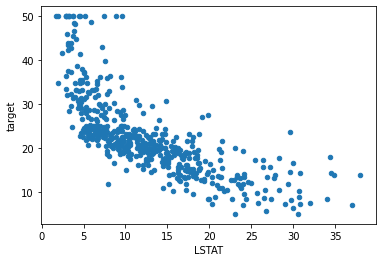

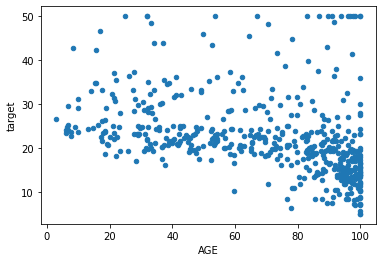

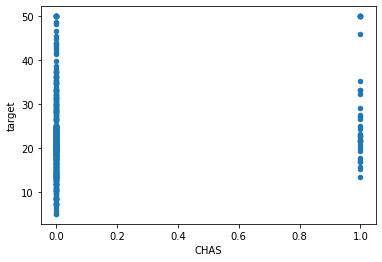

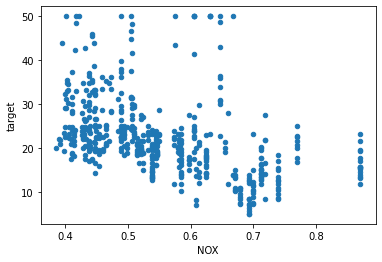

In [21]:
housing_df.plot.scatter(x='LSTAT',y='target')
housing_df.plot.scatter(x='AGE',y='target')
housing_df.plot.scatter(x='CHAS',y='target')
housing_df.plot.scatter(x='NOX',y='target')

In [22]:
lr = LinearRegression()
X=housing_df[['CRIM',	'ZN',	'INDUS',	'CHAS',	'NOX',	'RM',	'AGE',	'DIS',	'RAD',	'TAX',	'PTRATIO',	'B',	'LSTAT']]
y=housing_df['target']

In [23]:
lr.normalize=False
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
print(lr.predict([X.iloc[501]])*1000)
print((np.dot(lr.coef_,X.iloc[501])+lr.intercept_)*1000)
print(y.iloc[501]*1000)

[23533.34054667]
23533.340546667085
22400.0


In [25]:
print(lr.score(X,y))
help(lr.score)

0.7406426641094095
Help on method score in module sklearn.base:

score(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Return the coefficient of determination R^2 of the prediction.
    
    The coefficient R^2 is defined as (1 - u/v), where u is the residual
    sum of squares ((y_true - y_pred) ** 2).sum() and v is the total
    sum of squares ((y_true - y_true.mean()) ** 2).sum().
    The best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always
    predicts the expected value of y, disregarding the input features,
    would get a R^2 score of 0.0.
    
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        Test samples. For some estimators this may be a
        precomputed kernel matrix or a list of generic objects instead,
        shape = (n_samples, n_samples_fitted),
        where n_samples_fitted is the number of
        samples 

In [26]:
help(lr.score)

Help on method score in module sklearn.base:

score(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Return the coefficient of determination R^2 of the prediction.
    
    The coefficient R^2 is defined as (1 - u/v), where u is the residual
    sum of squares ((y_true - y_pred) ** 2).sum() and v is the total
    sum of squares ((y_true - y_true.mean()) ** 2).sum().
    The best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always
    predicts the expected value of y, disregarding the input features,
    would get a R^2 score of 0.0.
    
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        Test samples. For some estimators this may be a
        precomputed kernel matrix or a list of generic objects instead,
        shape = (n_samples, n_samples_fitted),
        where n_samples_fitted is the number of
        samples used in the fitting

In [27]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,lr.predict(X))

21.894831181729202

In [28]:
lr.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [29]:
print(housing_df.columns[lr.coef_.argmin()])
print(housing_df.columns[lr.coef_.argmax()])

NOX
RM


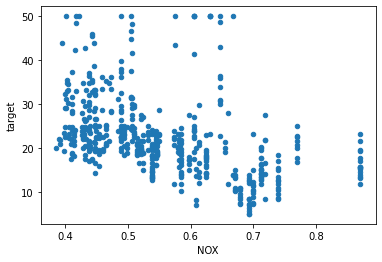

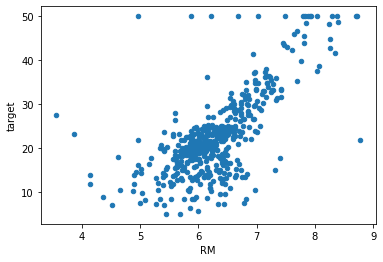

In [30]:
housing_df.plot.scatter(x='NOX',y='target')
housing_df.plot.scatter(x='RM',y='target')

# Ridge Regression (**Reguralization**)

For this next section, we will look at another toy problem. The goal here is to show a problem, and that the Ridge can help us solve this problem

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [32]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)
  
n_samples = 30

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.2

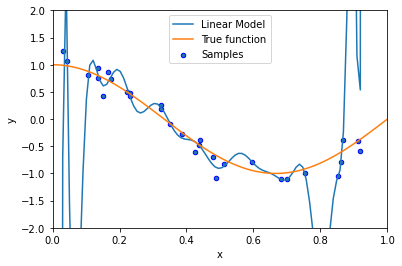

In [33]:
polynomial_features = PolynomialFeatures(degree=30,include_bias=False)
linear = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", LinearRegression())])


linear.fit(X[:, np.newaxis], y)

X_test = np.linspace(0, 1, 100)
pyplot.plot(X_test, linear.predict(X_test[:, np.newaxis]), label="Linear Model")
pyplot.plot(X_test, true_fun(X_test), label="True function")
pyplot.scatter(X, y, edgecolor='b', s=20, label="Samples")
pyplot.xlabel("x")
pyplot.ylabel("y")
pyplot.xlim((0, 1))
pyplot.ylim((-2, 2))
pyplot.legend(loc="best")

Wow, that does not look like a good fit! What went wrong? Lets look at the coefficents of our model. The regression model is the 2nd item in our pipeline above.

In [34]:
print(linear.steps[1][1].coef_)
print(np.linalg.norm(linear.steps[1][1].coef_))

[ 5.53780312e+04 -2.32477450e+06  5.43242472e+07 -8.02177091e+08
  8.02224325e+09 -5.65613576e+10  2.87242514e+11 -1.05676696e+12
  2.78156791e+12 -5.01421851e+12  5.44494980e+12 -1.77194849e+12
 -3.35137232e+12  3.14054073e+12  2.17015734e+12 -2.90144717e+12
 -2.22793482e+12  2.10961325e+12  2.73198649e+12 -8.21905653e+11
 -2.93722253e+12 -7.45286690e+11  2.42125181e+12  2.04131335e+12
 -1.38605173e+12 -2.72740437e+12  6.73995536e+11  3.18481429e+12
 -2.61239245e+12  6.15808319e+11]
12845955665052.416


Notice a problem? Hint, look at the e+ term... 

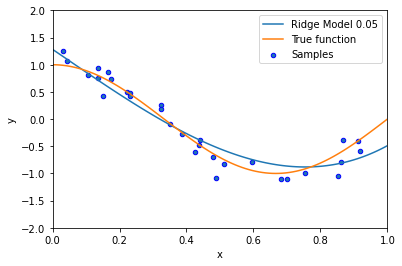

In [35]:
regularization_penalty = 0.05
polynomial_features = PolynomialFeatures(degree=3,include_bias=False)
linear_ridge = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", Ridge(alpha=.05))])


linear_ridge.fit(X[:, np.newaxis], y)

X_test = np.linspace(0, 1, 100)
pyplot.plot(X_test, linear_ridge.predict(X_test[:, np.newaxis]), label="Ridge Model " + str(regularization_penalty) )
pyplot.plot(X_test, true_fun(X_test), label="True function")
pyplot.scatter(X, y, edgecolor='b', s=20, label="Samples")
pyplot.xlabel("x")
pyplot.ylabel("y")
pyplot.xlim((0, 1))
pyplot.ylim((-2, 2))
pyplot.legend(loc="best")

In [36]:
linear_ridge.steps[1][1].coef_

array([-4.18782922, -0.29673739,  2.71321664])

In [37]:
np.linalg.norm(linear_ridge.steps[1][1].coef_)

4.998750962969997

The coefficents for the Ridge solution are much more reasonable values! Why is thath? How would you make that happen?

$$\|w\|_2 = \sqrt{\sum_{i=1}^d w_i^2}$$

By changing the objective function! Ridge changes it to become

$$L(X, Y) = \overbrace{\frac{1}{n} \sum_{i=1}^n \left(w^T x^{(i)} - y_i\right)^2}^{\text{Original Linear Regression Objective}} + \alpha \cdot \|w\|_2^2$$

This new $\alpha \cdot \|w\|_2^2$ term is called a ***regularizer***, and penalizes the model for having large weights! Hence, we now get smaller weights. 

Why do we *want* smaller weights?

What if the weights *should* be big? 